Информация о проекте

Компания UNICEF, чья миссия состоит в повышении уровня благополучия детей по всему миру, стремится выявлять студентов, находящихся в группе риска, на ранней стадии,  отслеживая влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике.

В этом проекте мне нужно:

    Проверить качество данных и очистить их, если это необходимо.
    Сформулировать предположения и гипотезы для дальнейшего построения модели, которая
    предсказывала бы результаты госэкзамена по математике для каждого ученика школы.
    Определиться с параметрами модели.
    Составить отчёт по результатам разведовательного анализа.

Загрузка и обзор данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from collections import Counter

In [2]:
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [4]:
stud_math = pd.read_csv('stud_math.csv')

Изучим данные в файле и типы данных у столбцов.

In [5]:
display(stud_math.head(10)) 
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Мы видим, что в DataFrame информация всего о 395 учениках (в файле 395 строк).

В файле 30 столбцов (колонок):

    13 колонок содержат числовые (количественные) данные;
    17 колонок содержат категоральные (строковые)данные.

Мы видим, что есть пропущенные элементы.
Проверим сколько пропущенных элементов (NaN) в каждом столбце.

In [6]:
stud_math.isnull().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

<AxesSubplot:>

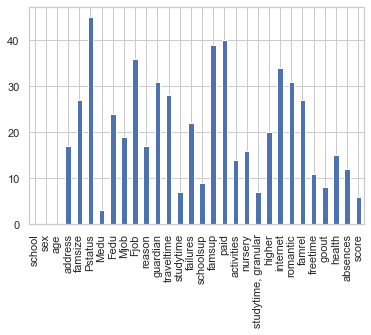

In [7]:
stud_math.isnull().sum().plot.bar()

Только три колонки ('school', 'sex', 'age') не имеют пропусков.

Колонки 'famsize', 'Pstatus', 'Fedu', 'Fjob', 'guardian', 'traveltime', 'failures', 'famsup', 'paid', 'higher', 'internet', 'romantic', 'famrel' имеют более 20 пропусков, уже имеют значение NaN. Сейчас не будем их заменять, сначала изучим данные и посмотрим, можно ли эти пропуски заполнить, удалить или оставить в значении None.

Изучим наименование колонок, возможно некоторые нужно переименовать для удобства.

In [8]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [9]:
# Переименуем стобец 'studytime, granular' и 'go_out' для удобства.
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                     'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'go_out', 'health', 'absences', 'score']

8 из 17 колонок ('schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'), имеющих категоральные данные имеют значения Yes или No, для удобства обработки данных заменим их на числовые: Yes = 1, No = 0.

In [10]:
def get_sup(x): 
    if x == 'yes':
        return 1
    if x == 'no':
        return 0
    else:
        return x

In [11]:
stud_math.schoolsup = stud_math.schoolsup.apply(get_sup)

In [12]:
stud_math.famsup = stud_math.famsup.apply(get_sup)

In [13]:
stud_math.paid = stud_math.paid.apply(get_sup)

In [14]:
stud_math.activities = stud_math.activities.apply(get_sup)

In [15]:
stud_math.nursery = stud_math.nursery.apply(get_sup)

In [16]:
stud_math.higher = stud_math.higher.apply(get_sup)

In [17]:
stud_math.internet = stud_math.internet.apply(get_sup)

In [18]:
stud_math.romantic = stud_math.romantic.apply(get_sup)

Рассмотрим каждую колонку.

In [19]:
pd.DataFrame(stud_math.Mjob.value_counts())
display(pd.DataFrame(stud_math.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.Mjob.value_counts() > 10).sum())
stud_math.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# School

аббревиатура школы, в которой учится ученик

In [20]:
pd.DataFrame(stud_math.school.value_counts())
display(pd.DataFrame(stud_math.school.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.school.value_counts() > 10).sum())
stud_math.loc[:, ['school']].info()

,school
GP,349
MS,46


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(-1.25, 1.25, -1.25, 1.25)

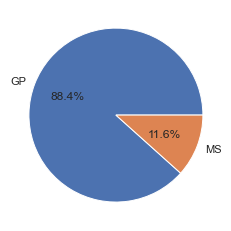

In [21]:
# Узнаем долю учеников каждой из школ.
vals = stud_math.school.value_counts()
labels = ['GP', 'MS']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis()

In [22]:
# Оценим средние значения об успеваемости в школах.
grouped_school = stud_math.groupby(
    ['school'])['score'].mean().sort_values(ascending=False)
print(grouped_school)

school
GP    52.630814
MS    49.444444
Name: score, dtype: float64


Колонка содержит категоральные данные, 395 строк, пропусков нет. Данные содержат информацию об учениках всего 2х школ, при этом данные одной из школ занимают только около 10%, соответственно не может существенно повлиять на предсказываемую величину. При этом мы можем оценить, что в школе GP в среднем баллы по колонке 'score' выше чем в школе MS, но не значительно.
Вывод: при имеющимся количестве данных данный показатель не будет влиять на предсказываемую величину.

In [128]:
stud_math.drop(['school'], inplace = True, axis = 1)

# Sex 

пол ученика ('F' - женский, 'M' - мужской)

In [23]:
pd.DataFrame(stud_math.sex.value_counts())
display(pd.DataFrame(stud_math.sex.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.sex.value_counts() > 10).sum())
stud_math.loc[:, ['sex']].info()

,sex
F,208
M,187


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [24]:
# Оценим средние значения об успеваемости в зависимости от пола ученика.
grouped_sex = stud_math.groupby(
    ['sex'])['score'].mean().sort_values(ascending=False)
print(grouped_sex)

sex
M    54.648649
F    50.098039
Name: score, dtype: float64


Колонка содержит категоральные данные, 395 строк, пропусков нет. Данные содержат информацию об принадлежности учеников к полу (женский/мужской): учеников обоих полов примерно поровну. Так же мы можем оценить, что ученики мужского пола в среднем имеют баллы по колонке 'score' выше, чем учиники женского пола, но не значительно. 
Вывод: по имеющимся данным это показательно не значительно , будет влиять на предсказываемую величину.

(-1.25, 1.25, -1.25, 1.25)

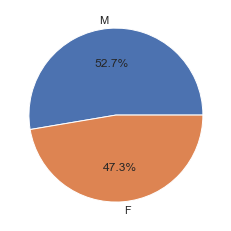

In [25]:
# Посмотрим долю учеников каждого из полов.
vals = stud_math.sex.value_counts()
labels = ['M', 'F']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis()

In [129]:
stud_math.drop(['sex'], inplace = True, axis = 1)

# Age 

возраст ученика

In [26]:
pd.DataFrame(stud_math.age.value_counts())
display(pd.DataFrame(stud_math.age.value_counts()))
print("Значений, встретившихся в столбце более 10 разsub:",
      (stud_math.age.value_counts() > 10).sum())
stud_math.loc[:, ['age']].info()

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Значений, встретившихся в столбце более 10 разsub: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

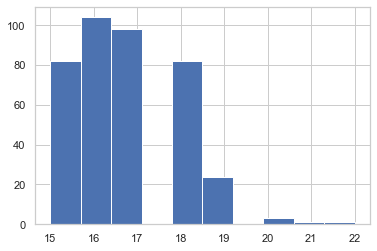

In [27]:
stud_math.age.hist()
stud_math.age.describe()

In [28]:
# Оценим средние значения об успеваемости в зависимости от возраста ученика
grouped_age = stud_math.groupby(
    ['age'])['score'].mean().sort_values(ascending=False)
print(grouped_age)

age
20    70.000000
15    56.280488
16    55.194175
17    51.377551
18    48.312500
19    40.238095
22    40.000000
21    35.000000
Name: score, dtype: float64


Колонка содержит числовые данные, 395 строк, пропусков нет. Как мы видим в основном госэкзамен сдают ученики в возрасте от 15 до 18 лет включительно, так же мы видим что в средмем ученики 15-17 лет получают более высокие баллы. Данных же об учениках старше 19 лет мало. Посмотрим, можем ли мы считать их выбросами?

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0, Границы выбросов [13.0, 21.0].


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

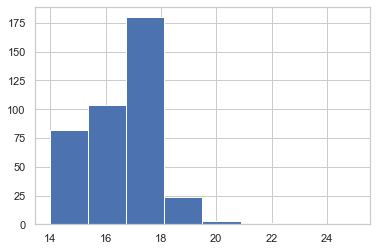

In [29]:
median = stud_math.age.median()
IQR = stud_math.age.quantile(0.75) - stud_math.age.quantile(0.25)
quant_25 = stud_math.age.quantile(0.25)
quant_75 = stud_math.age.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25, quant_75, IQR, quant_25 - 1.5*IQR, quant_75 + 1.5*IQR))
stud_math.age.loc[stud_math.age.between(
    quant_25 - 1.5*IQR, quant_75 + 1.5*IQR)].hist(bins=8, range=(14, 25))
plt

По полученным данным, мы видим, что выбросом можно считать данные учеников 22х лет (1 ученик), что не значительно повлияет на анализ данных, оставим эту информацию.

# Address 

тип адреса ученика ('U' - городской, 'R' - за городом)

In [30]:
pd.DataFrame(stud_math.address.value_counts())
display(pd.DataFrame(stud_math.address.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.address.value_counts() > 10).sum())
stud_math.loc[:, ['address']].info()

,address
U,295
R,83


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


(-1.25, 1.25, -1.25, 1.25)

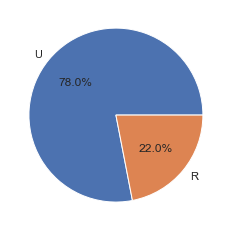

In [31]:
# Посмотрим долю учеников, проживающих в городе (U) или за городом (R).
vals = stud_math.address.value_counts()
labels = ['U', 'R']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis()

In [32]:
# Оценим средние значения об успеваемости в зависимости от места проживания.
grouped_address = stud_math.groupby(
    ['address'])['score'].mean().sort_values(ascending=False)
print(grouped_address)

address
U    53.573883
R    46.927711
Name: score, dtype: float64


Колонка содержит категоральные данные, 395 строк, есть пропуски (17). Информации, для их заполнения нет. Данные содержат информацию об учениках проживающих в городе (U) или пригороде (R). Учеников, проживающих в городе, почти в 4 раза больше, чем проживающих за городом. Так же мы видим, что существенной разницы в среднем в баллах по колонке 'score' между этими учениками нет.
Вывод: при имеющимся количестве данных данный показатель не будет влиять на предсказываемую величину.

In [130]:
stud_math.drop(['address'], inplace = True, axis = 1)

# Famsize 

размер семьи ('LE3' <= 3, 'GT3' >3)

In [33]:
pd.DataFrame(stud_math.famsize.value_counts())
display(pd.DataFrame(stud_math.famsize.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.famsize.value_counts() > 10).sum())
stud_math.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [34]:
# Оценим средние значения об успеваемости в зависимости от размера семьи ученика.
grouped_famsize = stud_math.groupby(
    ['famsize'])['score'].mean().sort_values(ascending=False)
print(grouped_famsize)

famsize
LE3    54.672897
GT3    51.509804
Name: score, dtype: float64


(-1.25, 1.25, -1.25, 1.25)

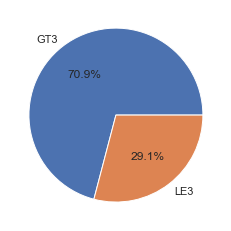

In [35]:
# Посмотрим долю учеников в зависимости от размера семьи ученика.
vals = stud_math.famsize.value_counts()
labels = ['GT3', 'LE3']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis()

Колонка содержит категоральные данные, 395 строк, есть пропуски (27). Информации, для их заполнения нет. Данные содержат информацию об учениках проживающих в семье численностью не более 3х человек (LE3) или более 3х человек (GT3). Учеников, проживающих в семье более 3х человек, почти в 2 раза больше. Так же мы видим, что существенной разницы в среднем в баллах по колонке 'score' между этими учениками нет.
Вывод: при имеющимся количестве данных данный показатель не будет влиять на предсказываемую величину.

In [131]:
stud_math.drop(['famsize'], inplace = True, axis = 1)

# Pstatus 

статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [36]:
pd.DataFrame(stud_math.Pstatus.value_counts())
display(pd.DataFrame(stud_math.Pstatus.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.Pstatus.value_counts() > 10).sum())
stud_math.loc[:, ['Pstatus']].info()

,Pstatus
T,314
A,36


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [37]:
# Оценим средние значения об успеваемости в зависимости от статуса семьи ученика.
grouped_Pstatus = stud_math.groupby(
    ['Pstatus'])['score'].mean().sort_values(ascending=False)
print(grouped_Pstatus)

Pstatus
A    55.138889
T    51.704545
Name: score, dtype: float64


(-1.25, 1.25, -1.25, 1.25)

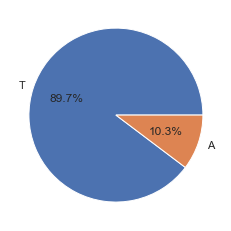

In [38]:
# Посмотрим долю учеников в зависимости от статуса семьи ученика.
vals = stud_math.Pstatus.value_counts()
labels = ['T', 'A']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis()

Колонка содержит категоральные данные, 395 строк, есть пропуски (45 - это значительно, более 10% данных в этой категории). Информации, для их заполнения нет. Данные содержат информацию об учениках, чьи родители проживают совместно или нет. Учеников, чьи родители не проживают совместно, всего 10%. Так же мы видим, что существенной разницы в среднем в баллах по колонке 'score' между этими учениками нет.
Вывод: при имеющимся количестве данных данный показатель не будет влиять на предсказываемую величину.

In [132]:
stud_math.drop(['Pstatus'], inplace = True, axis = 1)

# Medu 

образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [39]:
pd.DataFrame(stud_math.Medu.value_counts())
display(pd.DataFrame(stud_math.Medu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.Medu.value_counts() > 10).sum())
stud_math.loc[:, ['Medu']].info()

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

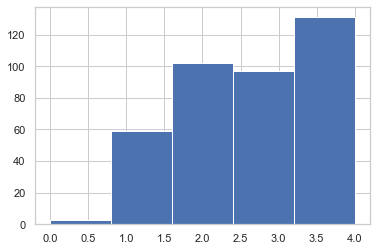

In [40]:
stud_math.Medu.hist(bins=5)
stud_math.Medu.describe()

Колонка содержит числовые данные, 395 строк, есть пропуски (3 прпуска, это не значительно, в колонке числовые данные, возможно земенить пропуски средним или медиальным статистическим значением). Как мы видим более половины матерей учеников имеют среднее или высшее образование. 

1. Заменим пропуски средним значением;
2. Проверим на наличие выбросов и принеобходимости удалим их;
3. Посмотрим зависит ли знания учеников от уровня образования в матери.

In [41]:
stud_math.loc[(stud_math['Medu'].isnull()), 'Medu'] = round(stud_math.Medu.mean(), 0)

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0, Границы выбросов [-1.0, 7.0].


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

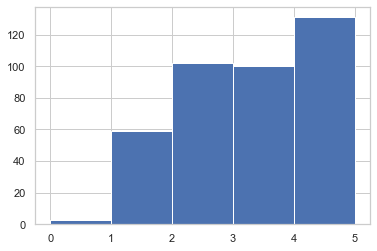

In [42]:
median_Medu = stud_math.Medu.median()
IQR_Medu = stud_math.Medu.quantile(0.75) - stud_math.Medu.quantile(0.25)
quant_25_Medu = stud_math.Medu.quantile(0.25)
quant_75_Medu = stud_math.Medu.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_Medu, quant_75_Medu, IQR_Medu, quant_25_Medu - 1.5*IQR_Medu, quant_75_Medu + 1.5*IQR_Medu))
stud_math.Medu.loc[stud_math.Medu.between(
    quant_25_Medu - 1.5*IQR_Medu, quant_75_Medu + 1.5*IQR_Medu)].hist(bins=5, range=(0, 5))
plt

In [43]:
# Оценим средние значения об успеваемости в зависимости от уровня образования матери ученика.
grouped_Medu = stud_math.groupby(
    ['Medu'])['score'].mean().sort_values(ascending=False)
print(grouped_Medu)

Medu
0.0    65.000000
4.0    58.816794
3.0    51.060606
2.0    49.600000
1.0    43.125000
Name: score, dtype: float64


Как мы видим, как таковых выбросов нет - оставим все значения. 
Так же мы видим, что у учеников, чья мать не имеет образования имеют в среднем высокие балы, однако и ученики, чьи матери имеют высшее образование, так же имеют в среднем высокие баллы. Используем эти данные. 

# Fedu

образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [44]:
pd.DataFrame(stud_math.Fedu.value_counts())
display(pd.DataFrame(stud_math.Fedu.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.Fedu.value_counts() > 10).sum())
stud_math.loc[:, ['Fedu']].info()

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

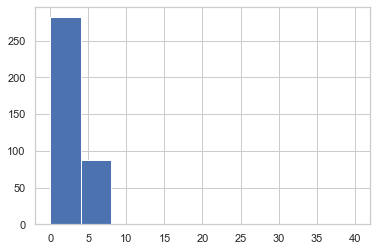

In [45]:
stud_math.Fedu.hist()
stud_math.Fedu.describe()

Колонка содержит числовые данные, 395 строк, есть пропуски (24 прпуска, это значительно, при этом в колонке числовые данные, возможно земенить пропуски средним или медиальным статистическим значением). Как мы видим уровень образования отцов ниже уровня обрахования матерей: более половины отцов учеников имеют неоконченное школьное или среднее образование. Так же мы видим аномальное значение '40' - возможно это описка, но в любом случае будет выбросом: 

1. Заменим пропуски средним значением;
2. Проверим на наличие выбросов и принеобходимости удалим их;
3. Посмотрим зависит ли знания учеников от уровня образования в отца.

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0, Границы выбросов [0.5, 4.5].


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

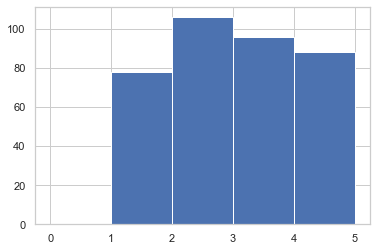

In [46]:
median_Fedu = stud_math.Fedu.median()
IQR_Fedu = stud_math.Fedu.quantile(0.75) - stud_math.Medu.quantile(0.25)
quant_25_Fedu = stud_math.Fedu.quantile(0.25)
quant_75_Fedu = stud_math.Fedu.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_Fedu, quant_75_Fedu, IQR_Fedu, quant_25_Fedu - 1.5*IQR_Fedu, quant_75_Fedu + 1.5*IQR_Fedu))
stud_math.Fedu.loc[stud_math.Fedu.between(
    quant_25_Fedu - 1.5*IQR_Fedu, quant_75_Fedu + 1.5*IQR_Fedu)].hist(bins=5, range=(0, 5))
plt

Мы видим, что из-за аномального значения, в выбросы попали данные об учениках, чьи отцы не имеют образование, их всего два, но по аналогии с уровнем образования матери, я понимаю, что эта информация важна. Опираясь на здравый смыст заменим знацение '40' на '4'.

In [47]:
stud_math.Fedu = stud_math.Fedu.apply(lambda x: 4.0 if x == 40.0 else x)

In [48]:
stud_math.loc[(stud_math['Fedu'].isnull()), 'Fedu'] = round(stud_math.Fedu.mean(), 0)

In [49]:
# Оценим средние значения об успеваемости в зависимости от уровня образования отца ученика.
grouped_Fedu = stud_math.groupby(
    ['Fedu'])['score'].mean().sort_values(ascending=False)
print(grouped_Fedu)

Fedu
0.0    65.000000
4.0    55.730337
3.0    53.644068
2.0    51.761905
1.0    46.333333
Name: score, dtype: float64


Мы видим схожие результаты, что и у колонки об уровне образования матерей учеников: чей отец не имеет образования имеют в среднем высокие балы, однако и ученики, чей отец имеет высшее образование, так же имеют в среднем высокие баллы. Используем эти данные.

# Mjob 

работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [50]:
pd.DataFrame(stud_math.Mjob.value_counts())
display(pd.DataFrame(stud_math.Mjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.Mjob.value_counts() > 10).sum())
stud_math.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Колонка содержит категоральные данные, 395 строк, есть пропуски (19). Информации, для их заполнения нет, или возможно заполнить эти данные как другое или 'без работы'. Данные содержат информацию об сфере деятельности матери учащихся. Посмотрим какими данными заполнена эта колонка по долям и влияет ли это на уровень образования их детей.

(-1.25, 1.25, -1.25, 1.25)

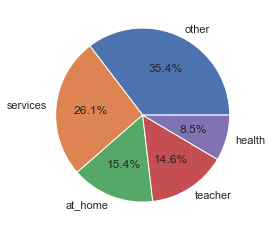

In [51]:
# Посмотрим какими данными заполнена эта колока по долям.
vals = stud_math.Mjob.value_counts()
labels = ['other', 'services', 'at_home', 'teacher', 'health']

fig, ax = plt.subplots()
ax.pie(vals,labels=labels, autopct='%1.1f%%')
ax.axis()

Мы видим, что в большинстве случаев сфера деятельности не указана, заменим пропущенные данные на 'other'.

In [52]:
stud_math.loc[(stud_math['Mjob'].isnull()), 'Mjob'] = 'other'

In [53]:
# Оценим средние значения об успеваемости в зависимости от сферы работы матери ученика.
grouped_Mjob = stud_math.groupby(
    ['Mjob'])['score'].mean().sort_values(ascending=False)
print(grouped_Mjob)

Mjob
health      60.625000
teacher     55.181818
services    54.744898
other       50.273973
at_home     45.689655
Name: score, dtype: float64


# Fjob

работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [54]:
pd.DataFrame(stud_math.Fjob.value_counts())
display(pd.DataFrame(stud_math.Fjob.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.Fjob.value_counts() > 10).sum())
stud_math.loc[:, ['Fjob']].info()

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Колонка содержит категоральные данные, 395 строк, есть пропуски (36). Информации, для их заполнения нет, или возможно заполнить эти данные как другое или 'без работы'. Данные содержат информацию об сфере деятельности отца учащихся. Посмотрим какими данными заполнена эта колонка по долям и влияет ли это на уровень образования их детей.

(-1.25, 1.25, -1.25, 1.25)

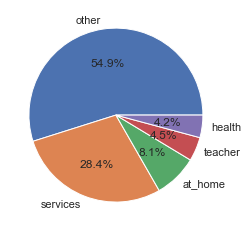

In [55]:
# Посмотрим какими данными заполнена эта колока по долям.
vals = stud_math.Fjob.value_counts()
labels = ['other', 'services', 'at_home', 'teacher', 'health']

fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.axis()

Мы видим, что в большинстве случаев сфера деятельности не указана, заменим пропущенные данные на 'other'.

In [56]:
stud_math.loc[(stud_math['Fjob'].isnull()), 'Fjob'] = 'other'

In [57]:
# Оценим средние значения об успеваемости в зависимости от сферы работы матери ученика.
grouped_Fjob = stud_math.groupby(
    ['Fjob'])['score'].mean().sort_values(ascending=False)
print(grouped_Fjob)

Fjob
teacher     59.827586
health      55.666667
other       51.891304
at_home     51.875000
services    50.454545
Name: score, dtype: float64


Мы видим, что данные из колонок, содержащих информацию о сфере деятельности родителей учеников схожи: ученики, чьи родители работают в сфере образования или здравоохранения в среднем получают более высокие балы.

# Reason

причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [58]:
pd.DataFrame(stud_math.reason.value_counts())
display(pd.DataFrame(stud_math.reason.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.reason.value_counts() > 10).sum())
stud_math.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Колонка содержит категоральные данные, 395 строк, есть пропуски (17). Данные содержат информацию о критериях, по которым была выбрана школа. Соответственно данный критерии будет влиять на выбор школы. Мы уже знаем, что в данных информация об учениках всего 2х школ, при этом данные одной из школ занимают только около 10%, соответственно эта информация не может повлиять на предсказываемую величину. 
Вывод: при имеющимся количестве данных данный показатель не будет влиять на предсказываемую величину, удалим его.

In [59]:
stud_math.drop(['reason'], inplace = True, axis = 1)

# Guardian 

опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [60]:
pd.DataFrame(stud_math.guardian.value_counts())
display(pd.DataFrame(stud_math.guardian.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.guardian.value_counts() > 10).sum())
stud_math.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [61]:
# Оценим средние значения об успеваемости в зависимости от уровня образования матери ученика.
grouped_guardian = stud_math.groupby(
    ['guardian'])['score'].mean().sort_values(ascending=False)
print(grouped_guardian)

guardian
father    53.430233
mother    52.600806
other     45.625000
Name: score, dtype: float64


Колонка содержит категоральные данные, 395 строк, есть пропуски (31 - это значительно, около 10% данных в этой категории). Информации, для их заполнения нет. Данные содержат информацию об опекунах учеников. Учеников, чьи опекуны не являются родителями, менее 10%. При этом мы видим, что есть разница в среднем в баллах по колонке 'score' между этими учениками.

Попробуем оцифровать данный показатель, где 0 - опекуном является родитель ученика (мать или отец) и 1 - опекуном являются третьи лица 

In [62]:
def get_guardian(x):
    if x == None:
        return None
    if x == 'other':
        return 1
    else:
        return 0

In [63]:
stud_math.guardian = stud_math.guardian.apply(get_guardian)

In [64]:
# Проверим, что изменилось
grouped_guardian = stud_math.groupby(
    ['guardian'])['score'].mean().sort_values(ascending=False)
print(grouped_guardian)

guardian
0    52.69863
1    45.62500
Name: score, dtype: float64


Используем эти данные.

# Traveltime 

время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [65]:
pd.DataFrame(stud_math.traveltime.value_counts())
display(pd.DataFrame(stud_math.traveltime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.traveltime.value_counts() > 10).sum())
stud_math.loc[:, ['traveltime']].info()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски (28 прпуска, значительно, в колонке числовые данные, допустимо земенить пропуски значением, сколько ученики в среднем тратят на дорогу в школу. 

1. Проверим на наличие выбросов и принеобходимости удалим их;
2. Заменим пропуски средним значением.

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0, Границы выбросов [-0.5, 3.5].


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

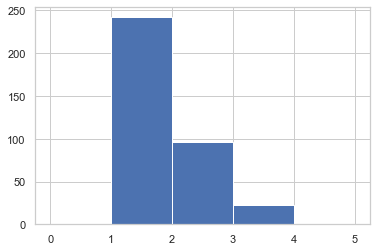

In [66]:
median_TT = stud_math.traveltime.median()
IQR_TT = stud_math.traveltime.quantile(0.75) - stud_math.traveltime.quantile(0.25)
quant_25_TT = stud_math.traveltime.quantile(0.25)
quant_75_TT = stud_math.traveltime.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_TT, quant_75_TT, IQR_TT, quant_25_TT - 1.5*IQR_TT, quant_75_TT + 1.5*IQR_TT))
stud_math.traveltime.loc[stud_math.traveltime.between(
    quant_25_TT - 1.5*IQR_TT, quant_75_TT + 1.5*IQR_TT)].hist(bins=5, range=(0, 5))
plt

In [67]:
# Выбросов нет, заменим пропуски средним значеним.
stud_math.loc[(stud_math['traveltime'].isnull()), 'traveltime'] = round(stud_math.traveltime.mean(), 0)

In [68]:
# проверим
pd.DataFrame(stud_math.traveltime.value_counts())
display(pd.DataFrame(stud_math.traveltime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.traveltime.value_counts() > 10).sum())

stud_math.loc[:, ['traveltime']].info()

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


Значений, встретившихся в столбце более 10 раз: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Мы видим, что более половины учеников тратят на дорогу в школу менее 30 минут. Для простоты обработки приведем данные к двоичному значению 0 - близко (до 30 минут), 1 - далеко (более 30 минут).

In [69]:
stud_math.traveltime = stud_math.traveltime.apply(lambda x: 0 if x <= 2.0 else 1)

In [70]:
# проверим
pd.DataFrame(stud_math.traveltime.value_counts())
display(pd.DataFrame(stud_math.traveltime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.traveltime.value_counts() > 10).sum())

stud_math.loc[:, ['traveltime']].info()

,traveltime
0,366
1,29


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   traveltime  395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [71]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_traveltime = stud_math.groupby(
    ['traveltime'])['score'].mean().sort_values(ascending=False)
print(grouped_traveltime)

traveltime
0    52.645429
1    47.321429
Name: score, dtype: float64


Данный показатель существенно не влияет на уровень подготовки учеников.

In [133]:
stud_math.drop(['traveltime'], inplace = True, axis = 1)

# Studytime 

время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [72]:
pd.DataFrame(stud_math.studytime.value_counts())
display(pd.DataFrame(stud_math.studytime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.studytime.value_counts() > 10).sum())
stud_math.loc[:, ['studytime']].info()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски (7 прпуска, это не значительно, в колонке числовые данные, допустимо земенить пропуски значением, сколько ученики в среднем занимаются вне школы. 

1. Проверим на наличие выбросов и принеобходимости удалим их;
2. Заменим пропуски средним значением.

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0, Границы выбросов [-0.5, 3.5].


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

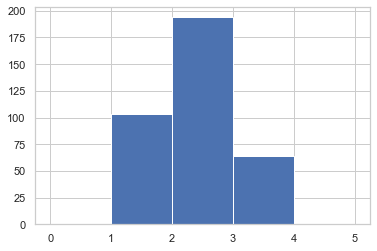

In [73]:
median_ST = stud_math.studytime.median()
IQR_ST = stud_math.studytime.quantile(0.75) - stud_math.studytime.quantile(0.25)
quant_25_ST = stud_math.studytime.quantile(0.25)
quant_75_ST = stud_math.studytime.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_ST, quant_75_ST, IQR_ST, quant_25_ST - 1.5*IQR_ST, quant_75_ST + 1.5*IQR_ST))
stud_math.studytime.loc[stud_math.studytime.between(
    quant_25_ST - 1.5*IQR_ST, quant_75_ST + 1.5*IQR_ST)].hist(bins=5, range=(0, 5))
plt

In [74]:
# Выбросов нет, заменим пропуски средним значеним.
stud_math.loc[(stud_math['studytime'].isnull()), 'studytime'] = round(stud_math.studytime.mean(), 0)

In [75]:
# проверим
pd.DataFrame(stud_math.studytime.value_counts())
display(pd.DataFrame(stud_math.studytime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.studytime.value_counts() > 10).sum())

stud_math.loc[:, ['studytime']].info()

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Мы видим, что более половины учеников тратят на занятия вне школы до 5 часов в неделю. Для простоты обработки приведем данные к двоичному значению 0 - до 5 часов, 1 - свыше 5.

In [76]:
stud_math.studytime = stud_math.studytime.apply(lambda x: 0 if x <= 2.0 else 1)

In [77]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_studytime = stud_math.groupby(
    ['studytime'])['score'].mean().sort_values(ascending=False)
print(grouped_studytime)

studytime
1    57.333333
0    50.735786
Name: score, dtype: float64


Мы видим, что ученики, которые тратят больше времени на занятия вне школы, имеют баллы на экзамене выше.

# Failures 

количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [78]:
pd.DataFrame(stud_math.failures.value_counts())
display(pd.DataFrame(stud_math.failures.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.failures.value_counts() > 10).sum())
stud_math.loc[:, ['failures']].info()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски (22 прпуска, это значительно, в колонке числовые данные, допустимо земенить пропуски средним или медиальным значением. В данной колонке информация о кол-ве внеучебных неудач учеников. 

Заменим пропуски средним значением.

In [79]:
pd.DataFrame(stud_math.failures).describe()

,failures
count,373.000000
mean,0.337802
std,0.743135
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


In [80]:
stud_math.loc[(stud_math['failures'].isnull()), 'failures'] = round(stud_math.failures.mean(), 0)

In [81]:
# Проверим
pd.DataFrame(stud_math.failures.value_counts())
display(pd.DataFrame(stud_math.failures.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.failures.value_counts() > 10).sum())
stud_math.loc[:, ['failures']].info()

,failures
0.0,315
1.0,49
2.0,16
3.0,15


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [82]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_failures = stud_math.groupby(
    ['failures'])['score'].mean().sort_values(ascending=False)
print(grouped_failures)

failures
0.0    56.121795
1.0    40.000000
2.0    32.333333
3.0    29.642857
Name: score, dtype: float64


Данные показатель имеет значение, используем его.

# Schoolsup

дополнительная образовательная поддержка (yes или no)

In [83]:
pd.DataFrame(stud_math.schoolsup.value_counts())
display(pd.DataFrame(stud_math.schoolsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.schoolsup.value_counts() > 10).sum())
stud_math.loc[:, ['schoolsup']].info()

,schoolsup
0.0,335
1.0,51


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   schoolsup  386 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски. В данной колонке информация о наличии дополнительная образовательная поддержка (yes или no). Пропуски мы заполнять не будем, так как нет необходимой информации.

In [84]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_schoolsup = stud_math.groupby(
    ['schoolsup'])['score'].mean().sort_values(ascending=False)
print(grouped_schoolsup)

schoolsup
0.0    53.126888
1.0    47.040816
Name: score, dtype: float64


Влияет на уровень подготовки учеников к экзамену.

# Famsup 

семейная образовательная поддержка (yes или no)

In [85]:
pd.DataFrame(stud_math.famsup.value_counts())
display(pd.DataFrame(stud_math.famsup.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.famsup.value_counts() > 10).sum())
stud_math.loc[:, ['famsup']].info()

,famsup
1.0,219
0.0,137


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famsup  356 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски. В данной колонке информация о наличии семейная образовательная поддержка (yes или no). Пропуски мы заполнять не будем, так как нет необходимой информации.

In [86]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_famsup= stud_math.groupby(
    ['famsup'])['score'].mean().sort_values(ascending=False)
print(grouped_famsup)

famsup
0.0    52.074074
1.0    51.712963
Name: score, dtype: float64


Практически не влияет.

In [134]:
stud_math.drop(['famsup'], inplace = True, axis = 1)

# Paid 

дополнительные платные занятия по математике (yes или no)

In [87]:
pd.DataFrame(stud_math.paid.value_counts())
display(pd.DataFrame(stud_math.paid.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.paid.value_counts() > 10).sum())
stud_math.loc[:, ['paid']].info()

,paid
0.0,200
1.0,155


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   paid    355 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски. В данной колонке информация о наличии дополнительных платных занятий по математике (yes или no). Пропуски мы заполнять не будем, так как нет необходимой информации.

In [88]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_paid= stud_math.groupby(
    ['paid'])['score'].mean().sort_values(ascending=False)
print(grouped_paid)

paid
1.0    55.00000
0.0    50.35533
Name: score, dtype: float64


Влияет на уровень подготовки учеников. Используем этот параметр.

# Activities

 дополнительные внеучебные занятия (yes или no)

In [89]:
pd.DataFrame(stud_math.activities.value_counts())
display(pd.DataFrame(stud_math.activities.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.activities.value_counts() > 10).sum())
stud_math.loc[:, ['activities']].info()

,activities
1.0,195
0.0,186


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   activities  381 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски. В данной колонке информация о том, были ли  дополнительные внеучебные занятия (yes или no). Пропуски мы заполнять не будем, так как нет необходимой информации.

In [90]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_activities= stud_math.groupby(
    ['activities'])['score'].mean().sort_values(ascending=False)
print(grouped_activities)

activities
1.0    52.682292
0.0    52.185792
Name: score, dtype: float64


Практически не влияет.

In [135]:
stud_math.drop(['activities'], inplace = True, axis = 1)

# Nursery

посещал детский сад (yes или no)

In [91]:
pd.DataFrame(stud_math.nursery.value_counts())
display(pd.DataFrame(stud_math.nursery.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.nursery.value_counts() > 10).sum())
stud_math.loc[:, ['nursery']].info()

,nursery
1.0,300
0.0,79


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nursery  379 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски. В данной колонке информация о том, посещал ли ученик детский сад (yes или no). Пропуски мы заполнять не будем, так как нет необходимой информации.

In [92]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_nursery= stud_math.groupby(
    ['nursery'])['score'].mean().sort_values(ascending=False)
print(grouped_nursery)

nursery
1.0    52.962963
0.0    50.000000
Name: score, dtype: float64


Влияет, но не значительно. При этом используем эти данные.

# Studytime_granular

In [93]:
pd.DataFrame(stud_math.studytime_granular.value_counts())
display(pd.DataFrame(stud_math.studytime_granular.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.studytime_granular.value_counts() > 10).sum())
stud_math.loc[:, ['studytime_granular']].info()

,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка имеет цифровые значения, отрицательные значения. Имеет пропуски (7), но это не значительно. У нас нет инвормации о том какие данные отображает данная колонка. Посмотрим как она коррелируется с другими данными.

<AxesSubplot:>

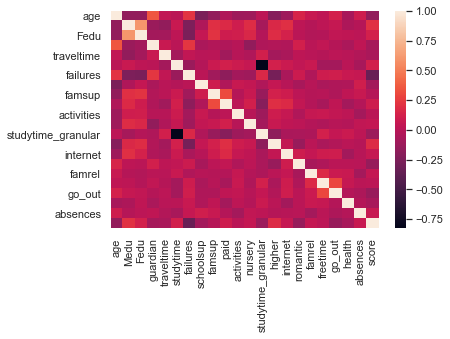

In [94]:
plt.figure()
sns.heatmap(stud_math.corr())

Мы видим аномальную корреляцию между колонками studytime и studytime_granular. 

Не будем использовать эти данные, удалим колонку.

In [95]:
stud_math.drop(['studytime_granular'], inplace = True, axis = 1)

# Higher

хочет получить высшее образование (yes или no)

In [96]:
pd.DataFrame(stud_math.higher.value_counts())
display(pd.DataFrame(stud_math.higher.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.higher.value_counts() > 10).sum())
stud_math.loc[:, ['higher']].info()

,higher
1.0,356
0.0,19


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   higher  375 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски. В данной колонке информация о том, собирается ли далее ученик поступать в высшее учебное заведение (yes или no). Пропуски мы заполнять не будем, так как нет необходимой информации.

In [97]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_higher= stud_math.groupby(
    ['higher'])['score'].mean().sort_values(ascending=False)
print(grouped_higher)

higher
1.0    53.100000
0.0    33.684211
Name: score, dtype: float64


Данный показатель значительно влияет на предсказываемую величину. Используем этот параметр.

# Internet 

наличие интернета дома (yes или no)

In [98]:
pd.DataFrame(stud_math.internet.value_counts())
display(pd.DataFrame(stud_math.internet.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.internet.value_counts() > 10).sum())
stud_math.loc[:, ['internet']].info()

,internet
1.0,305
0.0,56


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   internet  361 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски. В данной колонке информация о том, есть ли дома у ученика интернет (yes или no). Пропуски мы заполнять не будем, так как нет необходимой информации.

In [99]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_internet= stud_math.groupby(
    ['internet'])['score'].mean().sort_values(ascending=False)
print(grouped_internet)

internet
1.0    53.116667
0.0    49.090909
Name: score, dtype: float64


Влияет, но не значительно. При этом используем эти данные.

# Romantic

в романтических отношениях (yes или no)

In [100]:
pd.DataFrame(stud_math.romantic.value_counts())
display(pd.DataFrame(stud_math.romantic.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.romantic.value_counts() > 10).sum())
stud_math.loc[:, ['romantic']].info()

,romantic
0.0,240
1.0,124


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   romantic  364 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски. В данной колонке информация о том, состоит ли ученик в в романтических отношениях (yes или no). Пропуски мы заполнять не будем, так как нет необходимой информации.

In [101]:
# Теперь проверим влияет ли это на баллы учеников.
grouped_romantic= stud_math.groupby(
    ['romantic'])['score'].mean().sort_values(ascending=False)
print(grouped_romantic)

romantic
0.0    54.574468
1.0    47.682927
Name: score, dtype: float64


Влияет, но не значительно. При этом используем эти данные.

# Famrel

семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [102]:
pd.DataFrame(stud_math.famrel.value_counts())
display(pd.DataFrame(stud_math.famrel.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.famrel.value_counts() > 10).sum())
stud_math.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Значений, встретившихся в столбце более 10 раз: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски (27 пропуска, это значительно), в колонке числовые данные, допустимо земенить пропуски средним значением. 

1. Проверим на наличие выбросов и принеобходимости удалим их;
2. Заменим пропуски средним значением.

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 5.0, Границы выбросов [-3.5, 12.5].


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

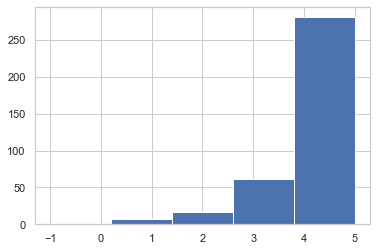

In [103]:
median_famrel = stud_math.famrel.median()
IQR_famrel = stud_math.famrel.quantile(
    0.75) - stud_math.traveltime.quantile(0.25)
quant_25_famrel = stud_math.famrel.quantile(0.25)
quant_75_famrel = stud_math.famrel.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_famrel, quant_75_famrel, IQR_famrel, quant_25_famrel - 1.5*IQR_famrel, quant_75_famrel + 1.5*IQR_famrel))
stud_math.famrel.loc[stud_math.famrel.between(
    quant_25_famrel - 1.5*IQR_famrel, quant_75_famrel + 1.5*IQR_famrel)].hist(bins=5, range=(-1, 5))
plt

Выбросов нет, но есть аномальное значение -1, заменим его на 1 и заменим пропуски на среднее значение.

In [104]:
stud_math.famrel = stud_math.famrel.apply(lambda x: 1.0 if x == -1.0 else x)

In [105]:
stud_math.loc[(stud_math['famrel'].isnull()), 'famrel'] = round(stud_math.famrel.mean(), 0)

In [106]:
# Оценим средние значения об успеваемости в зависимости от отношений в семье ученика.
grouped_famrel = stud_math.groupby(
    ['famrel'])['score'].mean().sort_values(ascending=False)
print(grouped_famrel)

famrel
5.0    54.896907
1.0    53.125000
4.0    51.536585
3.0    51.451613
2.0    48.529412
Name: score, dtype: float64


Мы видим, что в среднем уровень отношений в семье не влияет на успеваемость учеников. Не будем использовать этот параметр.

In [136]:
stud_math.drop(['famrel'], inplace = True, axis = 1)

# Freetime 

свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [107]:
pd.DataFrame(stud_math.freetime.value_counts())
display(pd.DataFrame(stud_math.freetime.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.freetime.value_counts() > 10).sum())
stud_math.loc[:, ['freetime']].info()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски (11 пропуска, значительно), в колонке числовые данные, допустимо земенить пропуски средним значением. 

In [108]:
pd.DataFrame(stud_math.freetime).describe()

,freetime
count,384.000000
mean,3.231771
std,0.993940
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [109]:
# Оценим средние значения об успеваемости в зависимости от свободного времени ученика.
grouped_freetime = stud_math.groupby(
    ['freetime'])['score'].mean().sort_values(ascending=False)
print(grouped_freetime)

freetime
2.0    57.539683
5.0    56.351351
4.0    52.636364
3.0    48.947368
1.0    48.333333
Name: score, dtype: float64


По разбросу среднего балла у учеников имеющих разное кол-во свободного времени, можно предположить, что данный показатель не влияет на прогнозируемый показатель. Не будем его использовать.

In [137]:
stud_math.drop(['freetime'], inplace = True, axis = 1)

# Go_out 

проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [110]:
pd.DataFrame(stud_math.go_out.value_counts())
display(pd.DataFrame(stud_math.go_out.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.go_out.value_counts() > 10).sum())
stud_math.loc[:, ['go_out']].info()

,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски (8 пропуска, это не значительно), в колонке числовые данные, допустимо земенить пропуски средним значением. 

In [111]:
pd.DataFrame(stud_math.go_out).describe()

,go_out
count,387.000000
mean,3.105943
std,1.115896
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [112]:
# Оценим средние значения об успеваемости в зависимости от времени проведенного учеником с друзьями.
grouped_go_out = stud_math.groupby(
    ['go_out'])['score'].mean().sort_values(ascending=False)
print(grouped_go_out)

go_out
2.0    55.990099
3.0    55.158730
4.0    49.506173
1.0    49.347826
5.0    44.509804
Name: score, dtype: float64


Так же как и по показателю Freetime, по разбросу среднего балла у учеников, можно предположить, что данный показатель не влияет на прогнозируемый показатель. Не будем его использовать.

In [138]:
stud_math.drop(['go_out'], inplace = True, axis = 1)

# Health 

текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [113]:
pd.DataFrame(stud_math.health.value_counts())
display(pd.DataFrame(stud_math.health.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.health.value_counts() > 10).sum())
stud_math.loc[:, ['health']].info()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Значений, встретившихся в столбце более 10 раз: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски (15 пропуска, это не значительно), в колонке числовые данные, допустимо земенить пропуски средним значением. 
Проверим есть ли выбросы.

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0, Границы выбросов [0.0, 8.0].


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

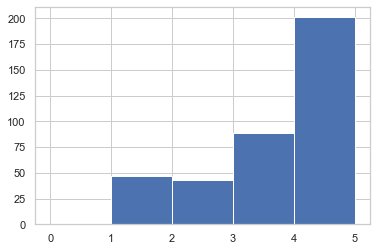

In [114]:
median_health = stud_math.health.median()
IQR_health = stud_math.health.quantile(
    0.75) - stud_math.health.quantile(0.25)
quant_25_health = stud_math.health.quantile(0.25)
quant_75_health = stud_math.health.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_health, quant_75_health, IQR_health, quant_25_health - 1.5*IQR_health, quant_75_health + 1.5*IQR_health))
stud_math.health.loc[stud_math.health.between(
    quant_25_health - 1.5*IQR_health, quant_75_health + 1.5*IQR_health)].hist(bins=5, range=(0, 5))
plt

Выбросов нет.

In [115]:
# Оценим средние значения об успеваемости в зависимости от здоровья.
grouped_go_out = stud_math.groupby(
    ['go_out'])['score'].mean().sort_values(ascending=False)
print(grouped_go_out)

go_out
2.0    55.990099
3.0    55.158730
4.0    49.506173
1.0    49.347826
5.0    44.509804
Name: score, dtype: float64


Видим, что не зависит.

In [139]:
stud_math.drop(['health'], inplace = True, axis = 1)

# Absences

количество пропущенных занятий

In [116]:
pd.DataFrame(stud_math.absences.value_counts())
display(pd.DataFrame(stud_math.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.absences.value_counts() > 10).sum())
stud_math.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Колонка содержит числовые данные, 395 строк, есть пропуски (12 пропуска, это не значительно), в колонке числовые данные, допустимо земенить пропуски средним значением.

Сначала проверим есть ли выбросы.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0, Границы выбросов [-12.0, 20.0].


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

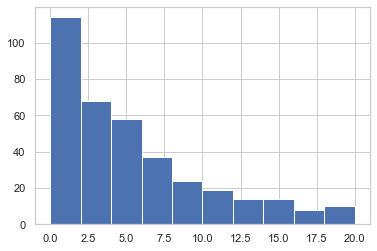

In [117]:
median_absences = stud_math.absences.median()
IQR_absences = stud_math.absences.quantile(
    0.75) - stud_math.absences.quantile(0.25)
quant_25_absences = stud_math.absences.quantile(0.25)
quant_75_absences = stud_math.absences.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_absences, quant_75_absences, IQR_absences, quant_25_absences - 1.5*IQR_absences, quant_75_absences + 1.5*IQR_absences))
stud_math.absences.loc[stud_math.absences.between(
    quant_25_absences - 1.5*IQR_absences, quant_75_absences + 1.5*IQR_absences)].hist()
plt

In [118]:
# Удалим выбросы
stud_math = stud_math.loc[stud_math.absences.between(
    quant_25_absences - 1.5*IQR_absences, quant_75_absences + 1.5*IQR_absences)]

In [119]:
# Проверим
pd.DataFrame(stud_math.absences.value_counts())
display(pd.DataFrame(stud_math.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.absences.value_counts() > 10).sum())
stud_math.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Значений, встретившихся в столбце более 10 раз: 8
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


Мы видим, что есть ученики, которые не пропускают (0) и имеют пропуски (1), для удобства работы приведем к двоичному значению эти данные.

In [120]:
def get_absences(x): 
    if x == 0:
        return 0
    if x > 0:
        return 1
    else:
        return x

In [121]:
stud_math.absences = stud_math.absences.apply(get_absences)

In [122]:
# Проверим
pd.DataFrame(stud_math.absences.value_counts())
display(pd.DataFrame(stud_math.absences.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.absences.value_counts() > 10).sum())
stud_math.loc[:, ['absences']].info()

,absences
1,255
0,111


Значений, встретившихся в столбце более 10 раз: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   absences  366 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


In [124]:
# Оценим средние значения об успеваемости в зависимости от здоровья.
grouped_absences = stud_math.groupby(
    ['absences'])['score'].mean().sort_values(ascending=False)
print(grouped_absences)

absences
1    56.215139
0    42.363636
Name: score, dtype: float64


Мы видим, что ученики имеющие пропуски, в среднем имеют баллы выше чем, ученики без пропусков. Не логично, конечно, но как есть. Данна существено различаются, используем их.

# Score

баллы по госэкзамену по математике

In [123]:
pd.DataFrame(stud_math.score.value_counts())
display(pd.DataFrame(stud_math.score.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:",
      (stud_math.score.value_counts() > 10).sum())
stud_math.loc[:, ['score']].info()

,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


Значений, встретившихся в столбце более 10 раз: 11
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   361 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


Колонка содержит числовые данные, 395 строк, есть пропуски (6 пропусков, это не значительно), в колонке числовые данные, допустимо земенить пропуски средним значением.
В колонке данные содержащие наш прогнозируемый параметр - результаты экзаменов по 100 балльной шкале. Проверим его на наличие выбросов.

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0, Границы выбросов [-5.0, 115.0].


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

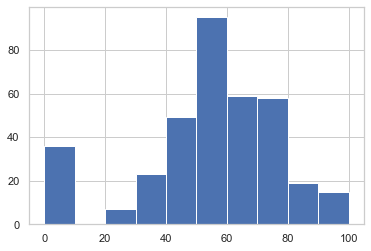

In [125]:
median_score = stud_math.score.median()
IQR_score = stud_math.score.quantile(
    0.75) - stud_math.score.quantile(0.25)
quant_25_score = stud_math.score.quantile(0.25)
quant_75_score = stud_math.score.quantile(0.75)
print('25-й перцентиль: {}, 75-й перцентиль: {}, IQR: {}, Границы выбросов [{}, {}].'.format(
    quant_25_score, quant_75_score, IQR_score, quant_25_score - 1.5*IQR_score, quant_75_score + 1.5*IQR_score))
stud_math.score.loc[stud_math.score.between(
    quant_25_score - 1.5*IQR_score, quant_75_score + 1.5*IQR_score)].hist()
plt

Выбросов нет, но мы видим, что есть ученики не набравшие ни одного балла.

# Корреляционный анализ

Выясним, какие столбцы коррелируют с результатами экзамена 'score'

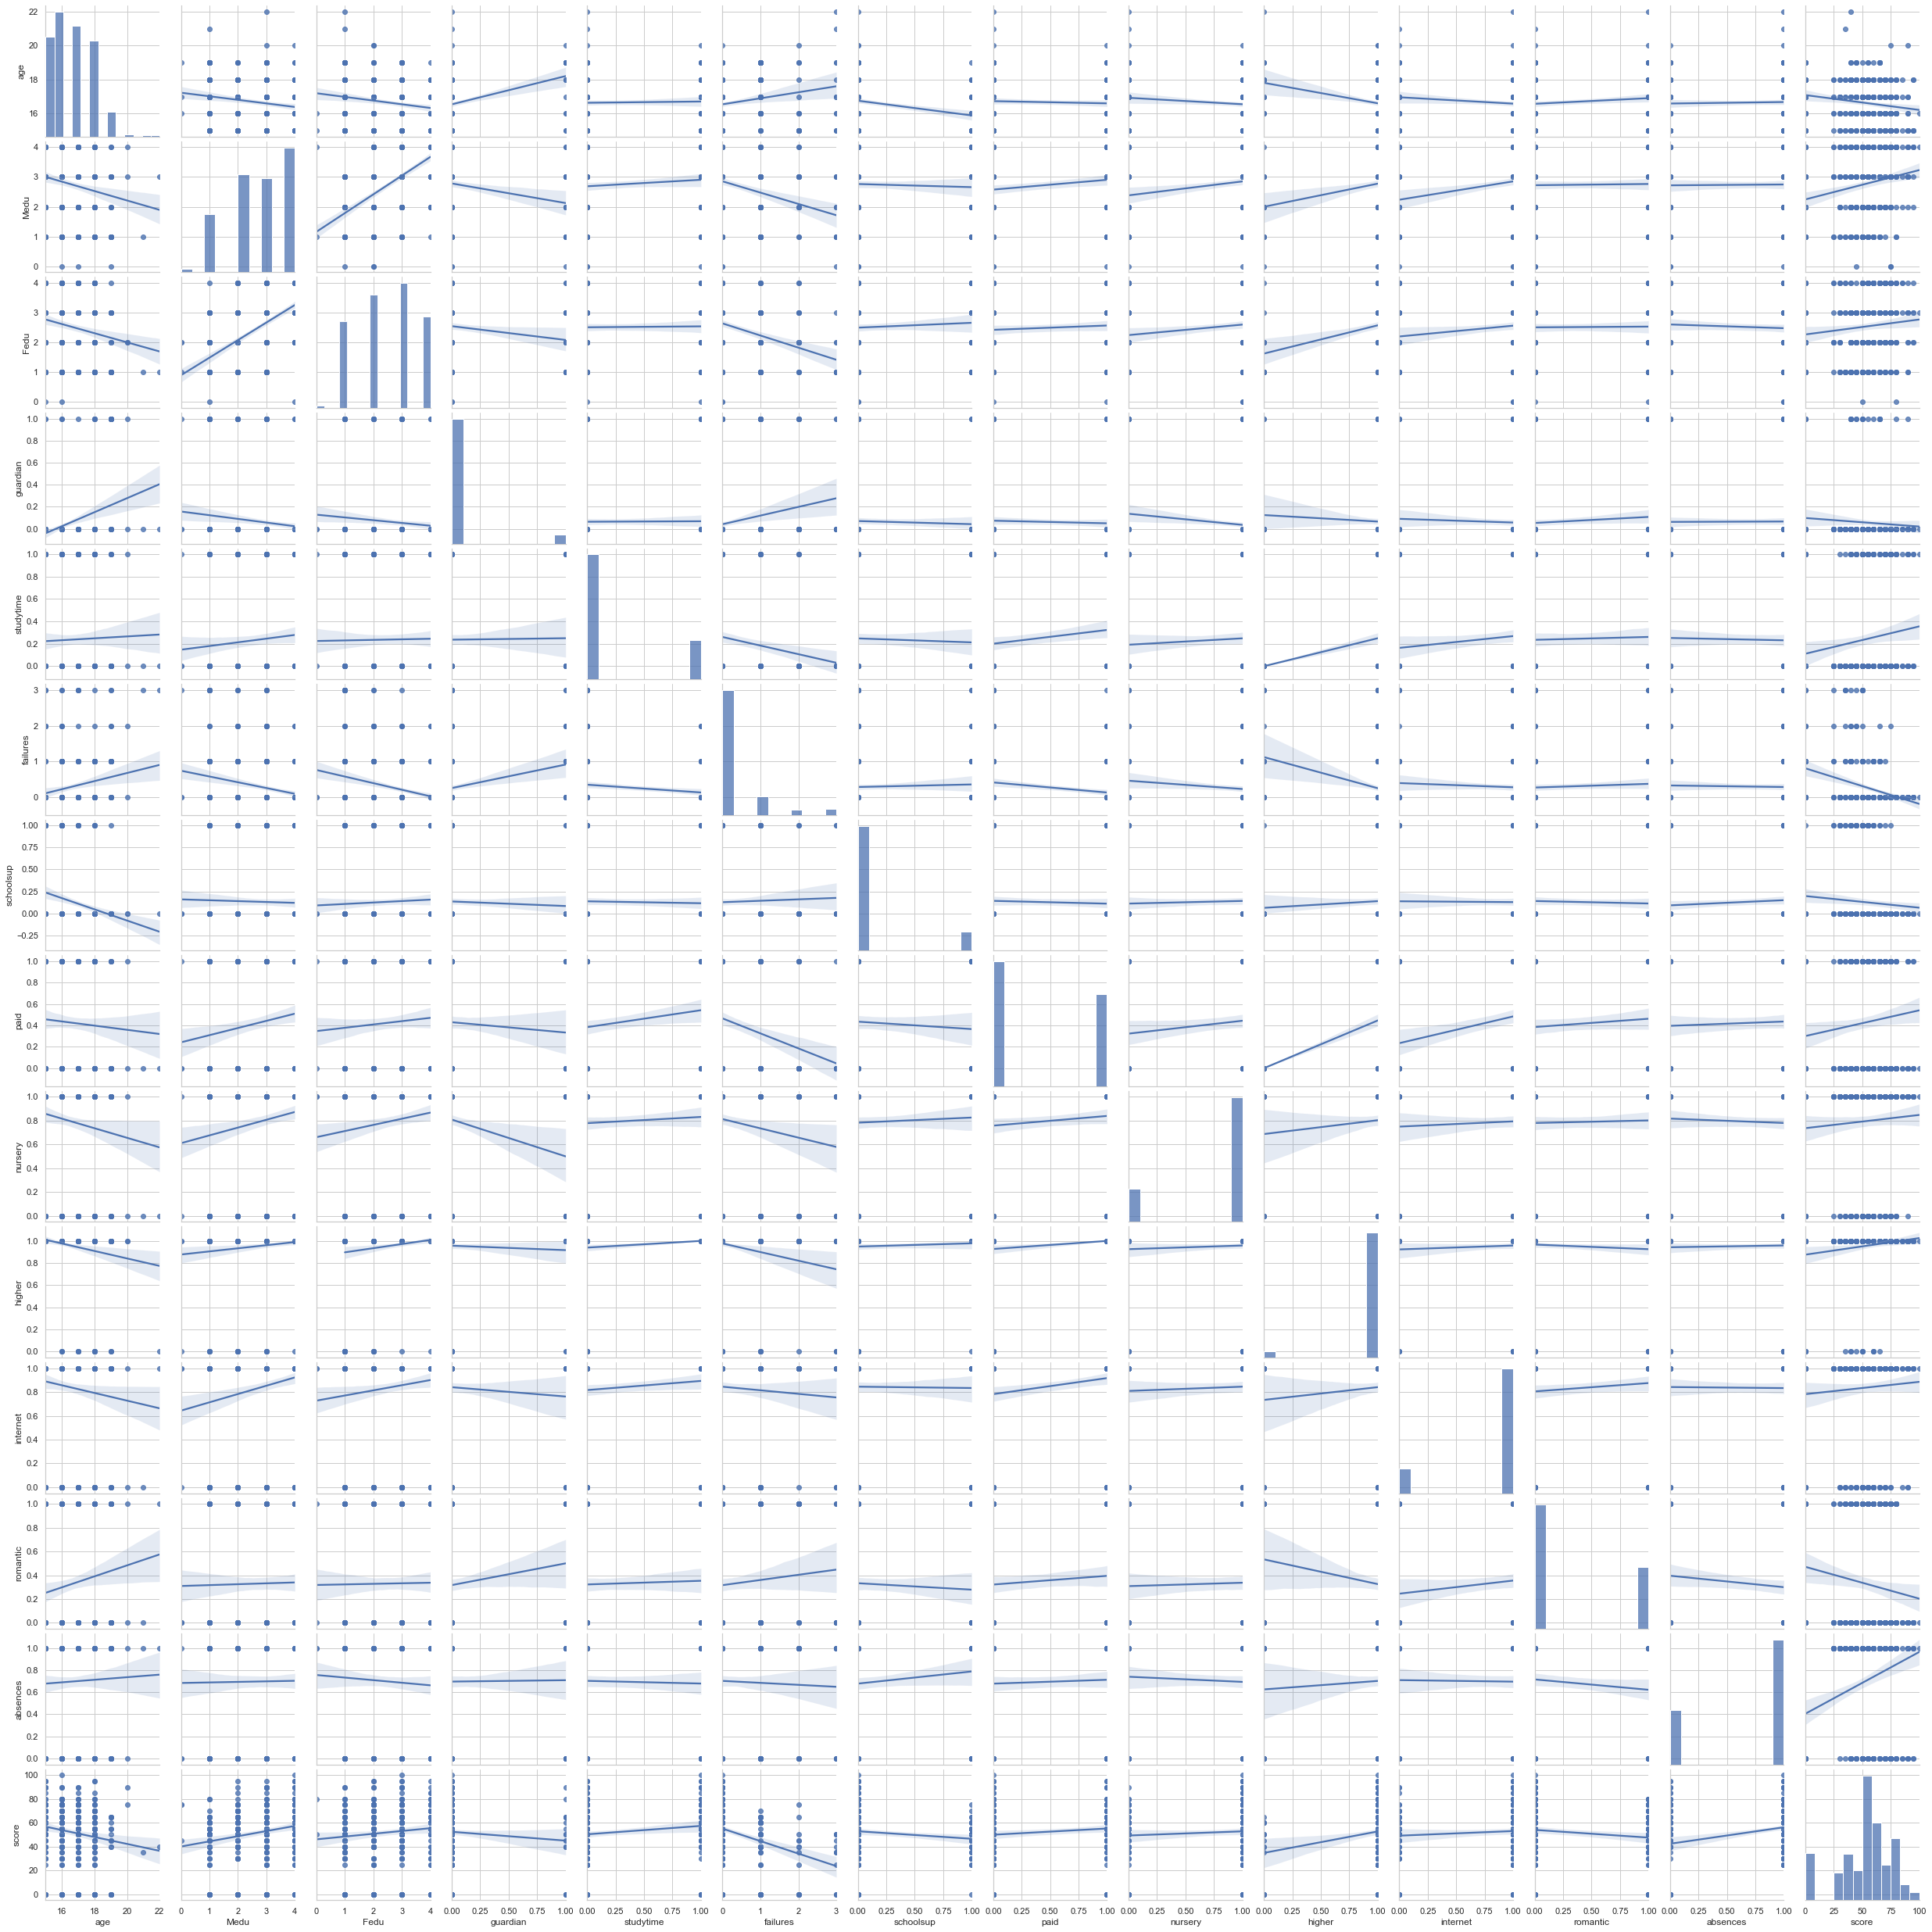

In [140]:
sns.pairplot(stud_math, kind = 'reg')

In [141]:
stud_math.corr()

,age,Medu,Fedu,guardian,studytime,failures,schoolsup,paid,nursery,higher,internet,romantic,absences,score
age,1.000000,-0.181989,-0.182185,0.324872,0.025100,0.199735,-0.235179,-0.050626,-0.123399,-0.201385,-0.110028,0.123662,0.031864,-0.159306
Medu,-0.181989,1.000000,0.609008,-0.148299,0.085137,-0.247298,-0.032300,0.148558,0.175227,0.147670,0.207352,0.017574,0.011833,0.206390
Fedu,-0.182185,0.609008,1.000000,-0.107683,0.012494,-0.273585,0.051929,0.066960,0.134843,0.188330,0.125221,0.010801,-0.054009,0.108449
guardian,0.324872,-0.148299,-0.107683,1.000000,0.007651,0.227121,-0.038366,-0.047871,-0.176586,-0.048545,-0.051279,0.100035,0.006692,-0.075828
studytime,0.025100,0.085137,0.012494,0.007651,1.000000,-0.129058,-0.028054,0.139444,0.054750,0.122859,0.089911,0.028149,-0.022547,0.131467
failures,0.199735,-0.247298,-0.273585,0.227121,-0.129058,1.000000,0.034090,-0.198580,-0.134328,-0.259996,-0.059286,0.066858,-0.027716,-0.322940
schoolsup,-0.235179,-0.032300,0.051929,-0.038366,-0.028054,0.034090,1.000000,-0.046964,0.036023,0.047294,-0.010320,-0.039064,0.080417,-0.091642
paid,-0.050626,0.148558,0.066960,-0.047871,0.139444,-0.198580,-0.046964,1.000000,0.099059,0.180542,0.183593,0.075354,0.037446,0.112124
nursery,-0.123399,0.175227,0.134843,-0.176586,0.054750,-0.134328,0.036023,0.099059,1.000000,0.062060,0.039691,0.024752,-0.041416,0.062384
higher,-0.201385,0.147670,0.188330,-0.048545,0.122859,-0.259996,0.047294,0.180542,0.062060,1.000000,0.061477,-0.093112,0.035046,0.164327


<AxesSubplot:>

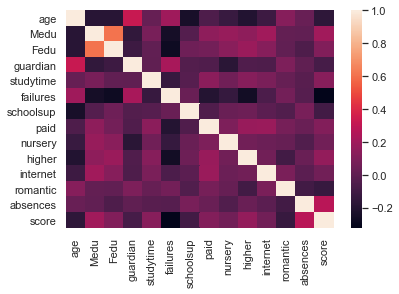

In [142]:
plt.figure()
sns.heatmap(stud_math.corr())

Показаети Medu и Fedu сильно коррелируются друг с другом, можно оставить один из показателей.

# Анализ номинативных переменных

In [144]:
display(stud_math.head(10)) 
stud_math.info() 

,age,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,schoolsup,paid,nursery,higher,internet,romantic,absences,score
0,18,4.0,4.0,at_home,teacher,0,0,0.0,1.0,0.0,1.0,1.0,NaN,0.0,1,30.0
1,17,1.0,1.0,at_home,other,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,30.0
2,15,1.0,1.0,at_home,other,0,0,3.0,1.0,NaN,1.0,1.0,1.0,NaN,1,50.0
3,15,4.0,2.0,health,other,0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,75.0
4,16,3.0,3.0,other,other,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,50.0
5,16,4.0,3.0,services,other,0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1,75.0
6,16,2.0,2.0,other,other,0,0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,55.0
7,17,4.0,4.0,other,teacher,0,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,30.0
8,15,3.0,2.0,services,other,0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,95.0
9,15,3.0,4.0,other,other,0,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        366 non-null    int64  
 1   Medu       366 non-null    float64
 2   Fedu       366 non-null    float64
 3   Mjob       366 non-null    object 
 4   Fjob       366 non-null    object 
 5   guardian   366 non-null    int64  
 6   studytime  366 non-null    int64  
 7   failures   366 non-null    float64
 8   schoolsup  357 non-null    float64
 9   paid       328 non-null    float64
 10  nursery    350 non-null    float64
 11  higher     348 non-null    float64
 12  internet   334 non-null    float64
 13  romantic   336 non-null    float64
 14  absences   366 non-null    int64  
 15  score      361 non-null    float64
dtypes: float64(10), int64(4), object(2)
memory usage: 48.6+ KB


In [146]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

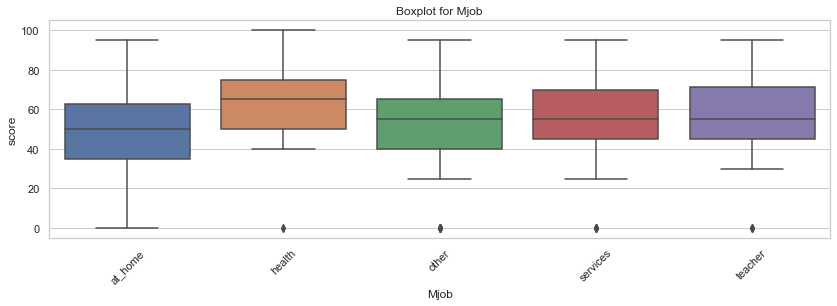

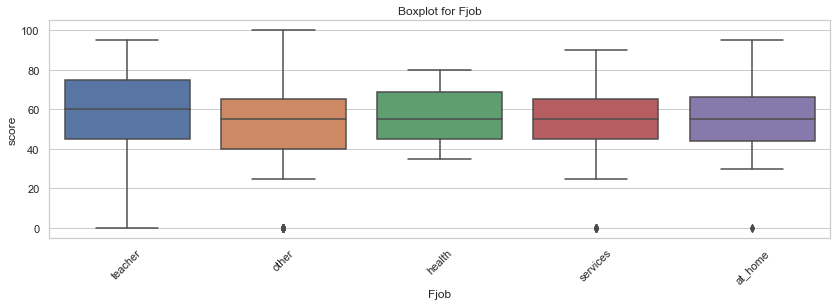

In [147]:
for col in ['Mjob', 'Fjob']:
    get_boxplot(col)

In [150]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [151]:
for col in ['Mjob', 'Fjob']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


Как мы видим, серьёзно отличается значения для колонки Mjob.

Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: 'age', 'Medu', 'Mjob', 'Fjob', 'guardian', 'studytime',
       'failures', 'schoolsup', 'paid', 'nursery', 'higher', 'internet',
       'romantic', 'absences', 'score'.

In [154]:
stud_math_for_model = stud_math.loc[:, ['age', 'Medu', 'Mjob', 'Fjob', 'guardian', 'studytime',
                                        'failures', 'schoolsup', 'paid', 'nursery', 'higher', 'internet', 'romantic', 'absences', 'score']]
stud_math_for_model.head()

,age,Medu,Mjob,Fjob,guardian,studytime,failures,schoolsup,paid,nursery,higher,internet,romantic,absences,score
0,18,4.0,at_home,teacher,0,0,0.0,1.0,0.0,1.0,1.0,NaN,0.0,1,30.0
1,17,1.0,at_home,other,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,30.0
2,15,1.0,at_home,other,0,0,3.0,1.0,NaN,1.0,1.0,1.0,NaN,1,50.0
3,15,4.0,health,other,0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,75.0
4,16,3.0,other,other,0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,50.0


В результате EDA для анализа влияния параметров различных аспектов жизни учеников на результаты экзамена по математике были получены следующие выводы:

1. В данных достаточно мало значений, в значимых переменных достаточно мало пустых значений, некоторые можно заполнить среднестатистическими значениями.
2. Выбросы найдены только в столбцах с уровнем образования отцов, семейные отношения и пропуски занятий, что позволяет сделать вывод о том, что данные достаточно чистые.
3. Данные по колонкам 'Guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic' удалось оцифровать.
4. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'age', 'Medu', 'Mjob', 'Fjob', 'guardian', 'studytime', 'failures', 'schoolsup', 'paid', 'nursery', 'higher', 'internet', 'romantic', 'absences', 'score'.